In [86]:
#Importar bibliotecas
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import queue as Q
from random import randint
from time import time

In [87]:
#Definir constantes
eps = 1e-12
inf = 10000000000
cores = ['b','g','r','c','m','y','k']

In [88]:
#Funcoes Graficas

def create_data(limite,pontos) :
    listax = []
    listay = []
    for i in range(pontos) : 
        listax.append(randint(-limite,limite))
        listay.append(randint(-limite,limite))

    return listax , listay

In [89]:
#Busca binária e BFS

def bb(num,tupla) :

    l=0
    r=inf
    asw = -1
    while(r-l>eps) :

        meio = (r+l)/2

        componentes = componentes_conexos(meio,tupla)

        if componentes <= num :
            asw = meio
            r = meio-1
        
        else : l = meio+1

    print(f'O banco de dados possui {componentes_conexos(asw,tupla,True)} componentes conexos' )

    return 

def componentes_conexos(R , tupla , graph=False):

    n = len(tupla[0])

    vis = []
    for i in range(n) : vis.append(False)

    componentes=0
    for i in range(n) : 
        if not vis[i] :
            bfs(i,R,vis,tupla,cores[componentes%len(cores)],graph)
            componentes+=1
    
    if graph : 
        plt.xlabel('x')
        plt.ylabel('y')
        plt.show()

    return componentes

def bfs( start , R , vis , tupla , cor , g=False ) :
    n = len(tupla[0]) # numero de pontos
    d = len(tupla) # numero de dimencoes
    fila = Q.Queue() 
    fila.put(start)
    pontosx = []
    pontosy = []
    while not fila.empty() :
        vertice = fila.get()
        if vis[vertice] : continue 
        vis[vertice] = True
        pontosx.append(tupla[0][vertice])
        pontosy.append(tupla[1][vertice])
        for prox in range(n) :
            dist=0
            for dim in range(d) :
                a = tupla[dim][prox]
                b = tupla[dim][vertice]
                dist+=(a-b)**2
            if not vis[prox] and dist <= R**2 : 
                fila.put(prox)
    if g : 
        plt.scatter(pontosx,pontosy,color=cor)
    return 


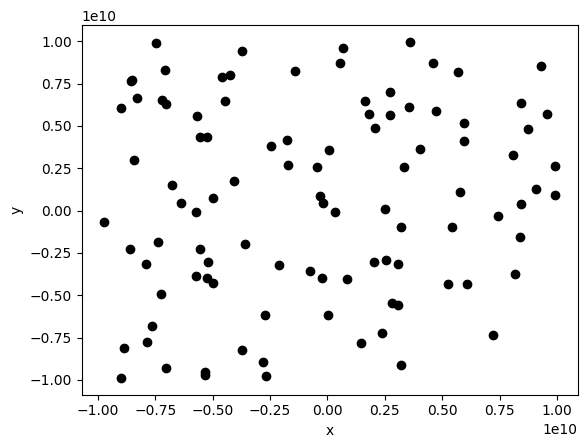

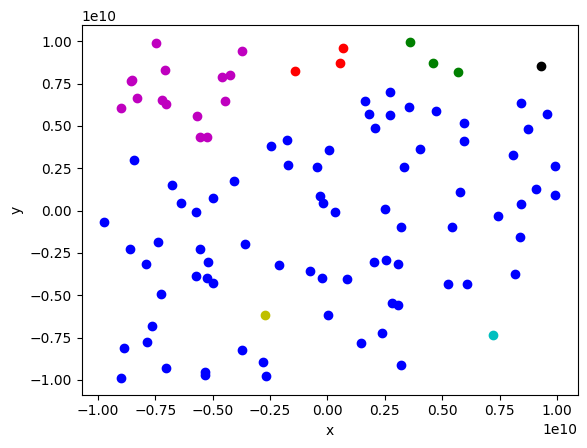

O banco de dados possui 7 componentes conexos
O codigo foi executado em 0.0 segundos


In [90]:
# Main
start = time()

x , y = create_data(10000000000,100)

plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x , y,color='black')
plt.show()

bb(len(cores),(x,y))

print(f'O codigo foi executado em {(time()-start)//1} segundos')
